<a href="https://colab.research.google.com/github/Bharatgaur/Trading/blob/main/TRADE_PROBABILITIES_2%25RISK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt

BASE_CAPITAL = 25000
RISK_PERCENTAGE_TRADE = 0.02  # 2% of cumulative capital per trade
LOT_SIZE = 15  # 15 units per trade
RISK_POINTS = 20  # Points risked per trade
LOSS_PER_LOT = LOT_SIZE * RISK_POINTS  # Loss per lot = 15 * 20 = 300
REWARD_PER_LOT = LOT_SIZE * 2.5 * RISK_POINTS  # Reward = 15 * 50 = 750
REWARD_POINTS = 2.5*RISK_POINTS
TARGET_PCT = 40
STOPLOSS_PCT = 60
MAX_QTY = 5000
# Define maximum quantity
MAX_QTY = 5000

# Calculate Transaction Charges
brokerage = 0.01
transaction_charges_pct = 0.03503
stt_pct = 0.1
ipft_pct = 0.0005
stamp_duty_pct = 0.003
sebi_charges_pct = 0.0001
gst_pct = 0.18

# **ENTRY PRICE**

In [3]:


# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Generate 1000 columns with random numbers between 100 and 500
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [random.randint(300, 450) for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('trade_entry.csv', index=False)

In [4]:
pd.read_csv('trade_entry.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,447,310,445,343,346,415,340,371,352,...,406,385,313,414,320,353,339,440,323,361
1,TRADE 0002,308,348,402,346,308,356,322,407,410,...,442,438,359,372,329,434,354,370,396,397
2,TRADE 0003,421,347,407,359,319,342,421,363,389,...,349,363,312,318,355,442,433,320,375,391
3,TRADE 0004,428,395,316,326,335,340,373,400,410,...,367,367,327,317,448,327,330,375,413,351
4,TRADE 0005,327,416,377,431,353,448,346,365,396,...,380,334,416,387,419,372,411,354,358,442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,360,427,433,315,397,330,443,428,353,...,410,332,365,311,336,444,327,345,331,418
996,TRADE 0997,308,369,390,396,306,319,376,337,375,...,310,344,377,342,351,305,419,364,361,428
997,TRADE 0998,415,426,415,393,428,400,401,332,392,...,416,374,374,380,420,382,446,332,322,367
998,TRADE 0999,382,322,397,435,364,429,439,444,305,...,389,428,393,397,354,363,317,378,306,438


# **RANDOM TARGET AND STOPLOSS**

**40 % TARGET 60 % STOPLOSS**

**RISK:REWARD 1:2.5**

In [5]:

# Generate trade numbers from "TRADE 0001" to "TRADE 1000"
trade_numbers = [f"TRADE {str(i).zfill(4)}" for i in range(1, 1001)]

# Create a dictionary to hold data for all columns
data = {
    "TRADE NO": trade_numbers  # First column: Trade numbers
}

# Function to randomly assign "TARGET" (40%) or "STOPLOSS" (60%)
def assign_target_or_stoploss():
    return random.choices(["TARGET", "STOPLOSS"], weights=[TARGET_PCT, STOPLOSS_PCT], k=1)[0]

# Generate 1000 columns with "TARGET" or "STOPLOSS"
for col_num in range(1, 1001):
    column_name = f"COLUMN_{col_num}"
    data[column_name] = [assign_target_or_stoploss() for _ in range(1000)]

# Create the DataFrame with 1001 columns
df = pd.DataFrame(data)

# Save the DataFrame to a single CSV file
df.to_csv('target_stoploss.csv', index=False)

In [6]:
pd.read_csv('target_stoploss.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,...,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS
1,TRADE 0002,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,...,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
2,TRADE 0003,TARGET,STOPLOSS,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,...,STOPLOSS,STOPLOSS,TARGET,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET
3,TRADE 0004,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,...,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS
4,TRADE 0005,TARGET,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,...,TARGET,TARGET,STOPLOSS,TARGET,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,...,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET
996,TRADE 0997,TARGET,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,...,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS
997,TRADE 0998,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,STOPLOSS,STOPLOSS,...,STOPLOSS,TARGET,STOPLOSS,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,STOPLOSS
998,TRADE 0999,STOPLOSS,STOPLOSS,STOPLOSS,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,...,STOPLOSS,TARGET,STOPLOSS,STOPLOSS,TARGET,TARGET,STOPLOSS,TARGET,TARGET,STOPLOSS


In [7]:
# Load the CSV file
df_t = pd.read_csv('target_stoploss.csv')

# Exclude the "TRADE NO" column from the calculations (if it exists)
if "TRADE NO" in df_t.columns:
    df_t_excluded = df_t.drop(columns=["TRADE NO"])
else:
    df_t_excluded = df_t

# 1. Calculate the max value of count "TARGET" and its column name
max_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmax()  # Column with max "TARGET"
max_target_value = (df_t_excluded[max_target_column] == "TARGET").sum()  # Max count of "TARGET"
max_target_percentage = (max_target_value / len(df_t)) * 100  # Percentage of max "TARGET"
print(f"Max Count of 'TARGET': {max_target_percentage:.1f}% in Column: {max_target_column}")

# 2. Calculate the min value of count "TARGET" and its column name
min_target_column = df_t_excluded.apply(lambda col: (col == "TARGET").sum()).idxmin()  # Column with min "TARGET"
min_target_value = (df_t_excluded[min_target_column] == "TARGET").sum()  # Min count of "TARGET"
min_target_percentage = (min_target_value / len(df_t)) * 100  # Percentage of min "TARGET"
print(f"Min Count of 'TARGET': {min_target_percentage:.1f}% in Column: {min_target_column}")

# 3. Calculate the average value of count "TARGET" from all columns
target_counts = df_t_excluded.apply(lambda col: (col == "TARGET").sum())  # Count "TARGET" in each column
average_target_value = target_counts.mean()  # Average count of "TARGET"
average_target_percentage = (average_target_value / len(df_t)) * 100  # Percentage of average "TARGET"
print(f"Average Count of 'TARGET': {average_target_percentage:.2f}%")


Max Count of 'TARGET': 46.5% in Column: COLUMN_644
Min Count of 'TARGET': 34.7% in Column: COLUMN_378
Average Count of 'TARGET': 40.01%


# **PnL**

In [8]:
# Load the two CSV files
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create an empty dictionary to hold the PnL data
pnl_data = {
    "TRADE NO": entry_df["TRADE NO"]  # Retain the "TRADE NO" column
}

# Iterate over each column (excluding "TRADE NO") to apply the PnL logic
for column in entry_df.columns[1:]:
    # Calculate PnL values for the column
    pnl_values = target_stoploss_df[column].apply(lambda x: (REWARD_POINTS if x == "TARGET" else -RISK_POINTS) * LOT_SIZE)

    # Create a Series with the base capital and concatenate it with PnL values
    base_series = pd.Series([BASE_CAPITAL])
    cumulative_pnl = pd.concat([base_series, pnl_values], ignore_index=True).cumsum()

    # Store the cumulative PnL in the dictionary (excluding the initial capital row)
    pnl_data[column] = cumulative_pnl.iloc[1:].values

# Create a DataFrame from the PnL data
pnl_df = pd.DataFrame(pnl_data)

# Save the modified PnL DataFrame to a new CSV file
pnl_df.to_csv('trade_pnl.csv', index=False)

In [9]:
pd.read_csv('trade_pnl.csv')

,TRADE NO,COLUMN_1,COLUMN_2,COLUMN_3,COLUMN_4,COLUMN_5,COLUMN_6,COLUMN_7,COLUMN_8,COLUMN_9,...,COLUMN_991,COLUMN_992,COLUMN_993,COLUMN_994,COLUMN_995,COLUMN_996,COLUMN_997,COLUMN_998,COLUMN_999,COLUMN_1000
0,TRADE 0001,24700.0,25750.0,24700.0,24700.0,24700.0,24700.0,25750.0,24700.0,24700.0,...,25750.0,24700.0,24700.0,25750.0,24700.0,25750.0,24700.0,24700.0,24700.0,24700.0
1,TRADE 0002,24400.0,26500.0,24400.0,24400.0,24400.0,25450.0,25450.0,24400.0,24400.0,...,26500.0,24400.0,25450.0,26500.0,24400.0,25450.0,25450.0,24400.0,24400.0,24400.0
2,TRADE 0003,25150.0,26200.0,25150.0,25150.0,25150.0,25150.0,26200.0,24100.0,25150.0,...,26200.0,24100.0,26200.0,27250.0,25150.0,26200.0,26200.0,24100.0,24100.0,25150.0
3,TRADE 0004,24850.0,25900.0,25900.0,24850.0,24850.0,24850.0,26950.0,24850.0,24850.0,...,26950.0,23800.0,25900.0,26950.0,25900.0,26950.0,25900.0,23800.0,24850.0,24850.0
4,TRADE 0005,25600.0,26650.0,26650.0,24550.0,25600.0,24550.0,27700.0,25600.0,24550.0,...,27700.0,24550.0,25600.0,27700.0,26650.0,27700.0,26650.0,23500.0,24550.0,24550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,148300.0,144100.0,152500.0,151450.0,130450.0,161950.0,161950.0,129400.0,157750.0,...,137800.0,136750.0,133600.0,112600.0,158800.0,133600.0,145150.0,165100.0,161950.0,128350.0
996,TRADE 0997,149050.0,144850.0,153250.0,151150.0,130150.0,161650.0,162700.0,129100.0,157450.0,...,137500.0,137500.0,134350.0,112300.0,158500.0,134350.0,144850.0,164800.0,161650.0,128050.0
997,TRADE 0998,148750.0,145600.0,154000.0,150850.0,130900.0,162400.0,162400.0,128800.0,157150.0,...,137200.0,138250.0,134050.0,113050.0,158200.0,135100.0,145600.0,164500.0,162400.0,127750.0
998,TRADE 0999,148450.0,145300.0,153700.0,150550.0,131650.0,162100.0,162100.0,129550.0,157900.0,...,136900.0,139000.0,133750.0,112750.0,158950.0,135850.0,145300.0,165250.0,163150.0,127450.0


In [10]:
# Load the CSV file
df_no_charges = pd.read_csv('trade_pnl.csv')

# Get the last row as a DataFrame
last_row_df = df_no_charges.iloc[[-1]]

# Filter only numeric values from the last row
numeric_values = last_row_df.select_dtypes(include=['number'])

# Find the max and min values along with their corresponding column names
max_value = numeric_values.max(axis=1).values[0]  # Max value
max_column = numeric_values.idxmax(axis=1).values[0]  # Column name of max value

min_value = numeric_values.min(axis=1).values[0]  # Min value
min_column = numeric_values.idxmin(axis=1).values[0]  # Column name of min value


# Output the results
print(f"Max Capital: {max_value} in Column: {max_column}")
Max_Capital_growth_pct = (max_value * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_value} in Column: {min_column}")
Min_Capital_growth_pct = (min_value * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max Capital: 213250.0 in Column: COLUMN_644
Max Capital growth with 1 lot: 853.00 %
Min Capital: 89350.0 in Column: COLUMN_378
Min Capital growth with 1 lot: 357.40 %


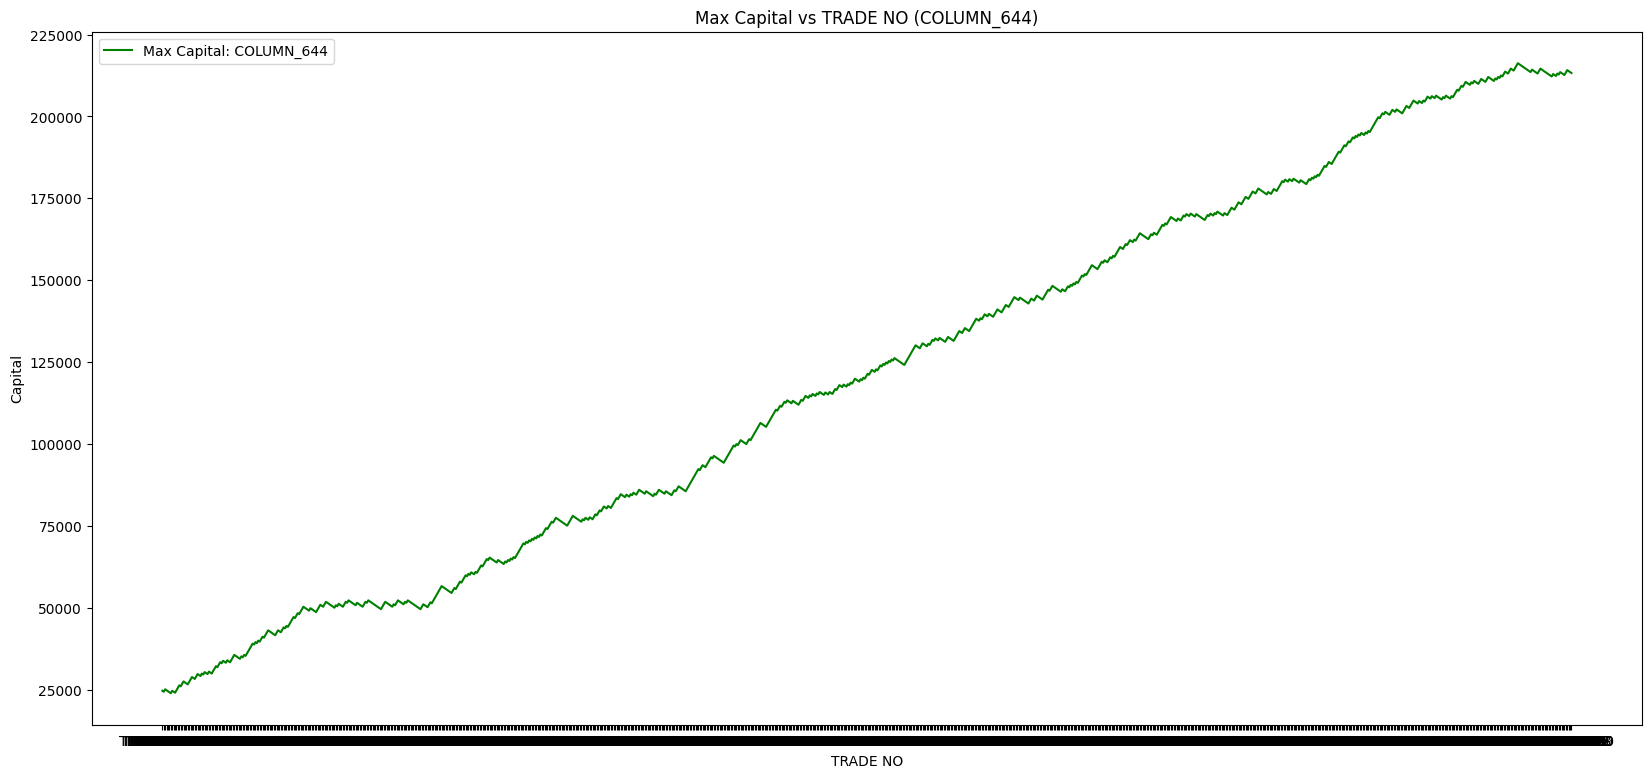

In [11]:
# Identify the max value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
max_column = numeric_values.idxmax(axis=1).values[0]

# Plot max capital vs TRADE NO
fig, ax = plt.subplots(figsize=(20, 9))

# Set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Plot with green line
ax.plot(df_no_charges['TRADE NO'],
        df_no_charges[max_column],
        label=f'Max Capital: {max_column}',
        color='green')

# Labels, title, legend, and grid
ax.set_xlabel('TRADE NO')
ax.set_ylabel('Capital')
ax.set_title(f'Max Capital vs TRADE NO ({max_column})')
ax.legend()
ax.grid(False)  # Remove gridlines

# Show plot
plt.show()

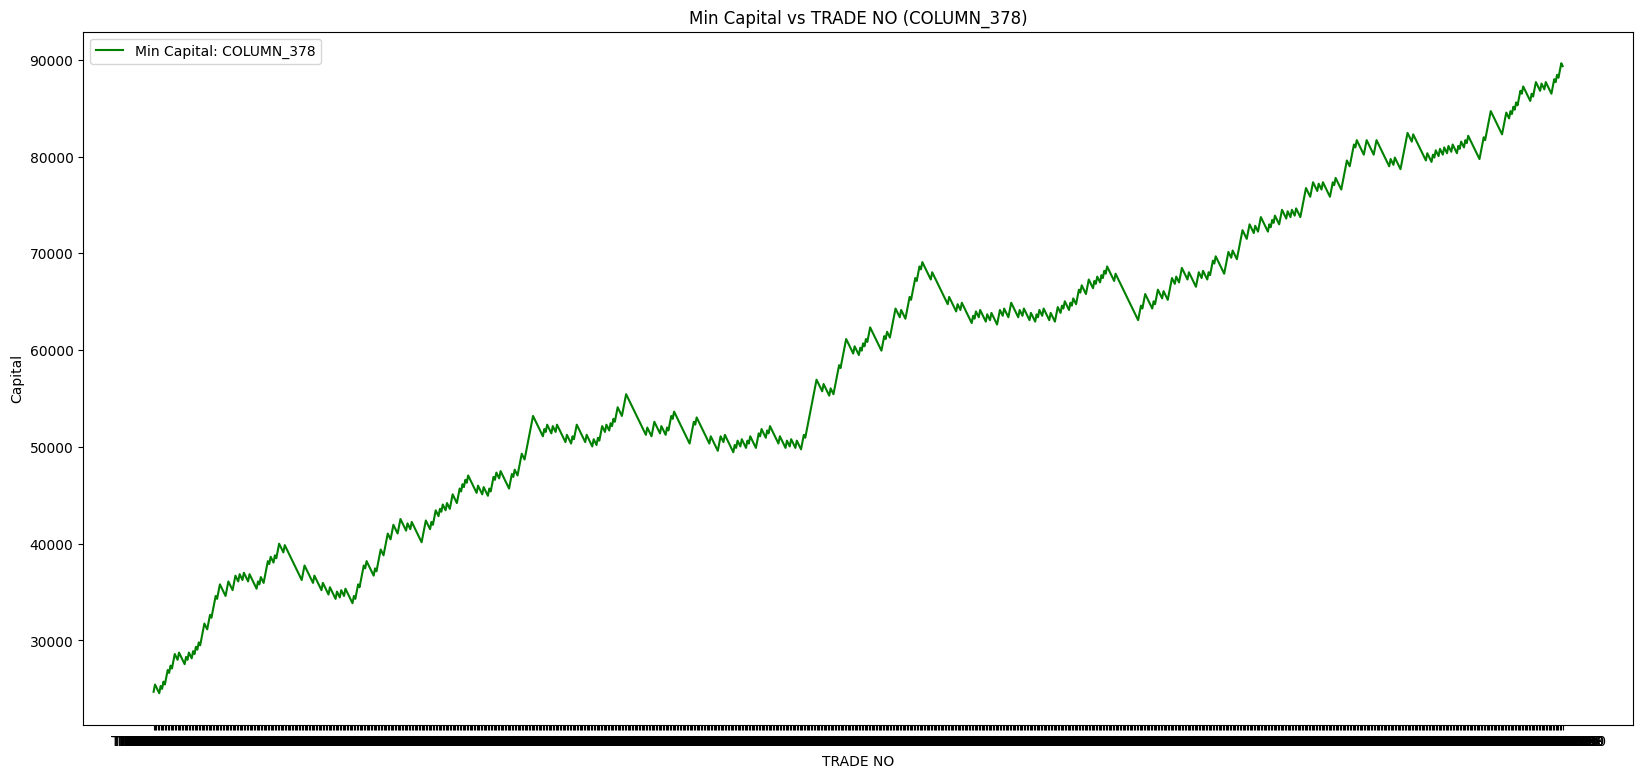

In [12]:
# Identify the min value column from the last row
last_row_df = df_no_charges.iloc[[-1]]
numeric_values = last_row_df.select_dtypes(include=['number'])
min_column = numeric_values.idxmin(axis=1).values[0]

# Plot min capital vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_no_charges['TRADE NO'], df_no_charges[min_column], label=f'Min Capital: {min_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_column})')
plt.legend()
plt.grid(False)  # Remove gridlines
plt.show()


# **QUANTITY CALCULATION**

PnL without charges and lot qty based on 2% of capital

In [13]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Define maximum quantity
MAX_QTY = 5000

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Calculate the risk per trade
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate entry price and lot size
        entry_price = entry_df[column].iloc[i]
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0  # Calculate QTY

        # Limit the maximum quantity to MAX_QTY
        qty = min(qty, MAX_QTY)

        qty_column.append(qty)

        # Calculate PnL for the current trade based on target or stoploss
        pnl_value = (REWARD_POINTS if target_stoploss_df[column].iloc[i] == "TARGET" else -RISK_POINTS) * LOT_SIZE
        trade_pnl = qty * pnl_value  # Multiply QTY with PnL per trade

        # Update cumulative capital for the next row
        cumulative_capital += trade_pnl
        pnl_column.append(cumulative_capital)

    # Store the PnL and QTY values in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Save the DataFrame to a single CSV file
final_df.to_csv('PnL_variable_lot.csv', index=False)

In [14]:
pd.read_csv('PnL_variable_lot.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,1,24700.0,1,25750.0,1,24700.0,1,24700.0,1,...,1,25750.0,1,24700.0,1,24700.0,1,24700.0,1,24700.0
1,TRADE 0002,1,24400.0,1,26500.0,1,24400.0,1,24400.0,1,...,1,25450.0,1,25450.0,1,24400.0,1,24400.0,1,24400.0
2,TRADE 0003,1,25150.0,1,26200.0,1,25150.0,1,25150.0,1,...,1,26200.0,1,26200.0,1,24100.0,1,24100.0,1,25150.0
3,TRADE 0004,1,24850.0,1,25900.0,1,25900.0,1,24850.0,1,...,1,26950.0,1,25900.0,1,23800.0,1,24850.0,1,24850.0
4,TRADE 0005,1,25600.0,1,26650.0,1,26650.0,1,24550.0,1,...,1,27700.0,1,26650.0,1,23500.0,1,24550.0,1,24550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,2400,35288350.0,1585,24976300.0,2549,40148050.0,2684,39465400.0,697,...,823,12965350.0,1876,27578950.0,5000,106430350.0,5000,77586850.0,566,8922700.0
996,TRADE 0997,2352,37052350.0,1665,26225050.0,2676,42155050.0,2631,38676100.0,732,...,864,13613350.0,1838,27027550.0,5000,104930350.0,5000,76086850.0,594,8744500.0
997,TRADE 0998,2470,36311350.0,1748,27536050.0,2810,44262550.0,2578,37902700.0,718,...,907,14293600.0,1801,28378300.0,5000,103430350.0,5000,79836850.0,582,8569900.0
998,TRADE 0999,2420,35585350.0,1835,26985550.0,2950,43377550.0,2526,37144900.0,753,...,952,15007600.0,1891,27811000.0,5000,107180350.0,5000,83586850.0,571,8398600.0


In [15]:
# Load the data from the CSV file
df_QTY = pd.read_csv('PnL_variable_lot.csv')

# Get the last row
last_row = df_QTY.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Set your base capital (replace with your actual value)
BASE_CAPITAL = 100000

# Print QTY results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")
print(f"Min QTY: {min_qty:.0f} in Column: {min_qty_column}")

# Print Capital results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = (max_capital * 100) / BASE_CAPITAL
print(f"Max Capital growth with 1 lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = (min_capital * 100) / BASE_CAPITAL
print(f"Min Capital growth with 1 lot: {Min_Capital_growth_pct:.2f} %")


Max QTY: 5000 in Column: COLUMN_6_QTY
Min QTY: 51 in Column: COLUMN_378_QTY
Max Capital: 348447400 in Column: COLUMN_644_CUM_PNL
Max Capital growth with 1 lot: 348447.40 %
Min Capital: 757900 in Column: COLUMN_562_CUM_PNL
Min Capital growth with 1 lot: 757.90 %


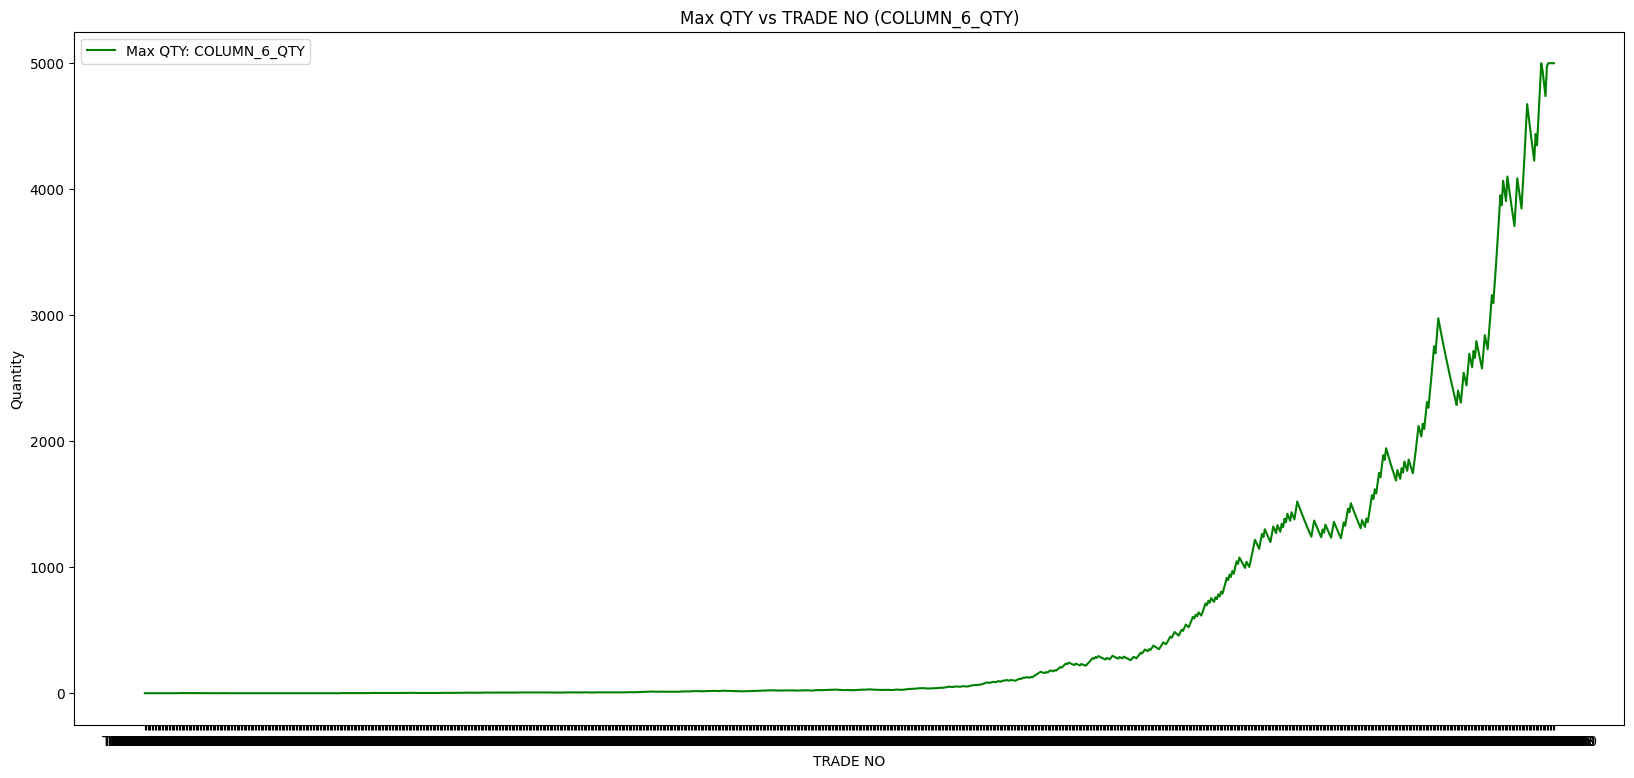

In [16]:
# Identify the column with max QTY
last_row = df_QTY.iloc[-1]
qty_columns = [col for col in df_QTY.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(False)  # Remove gridlines
plt.show()


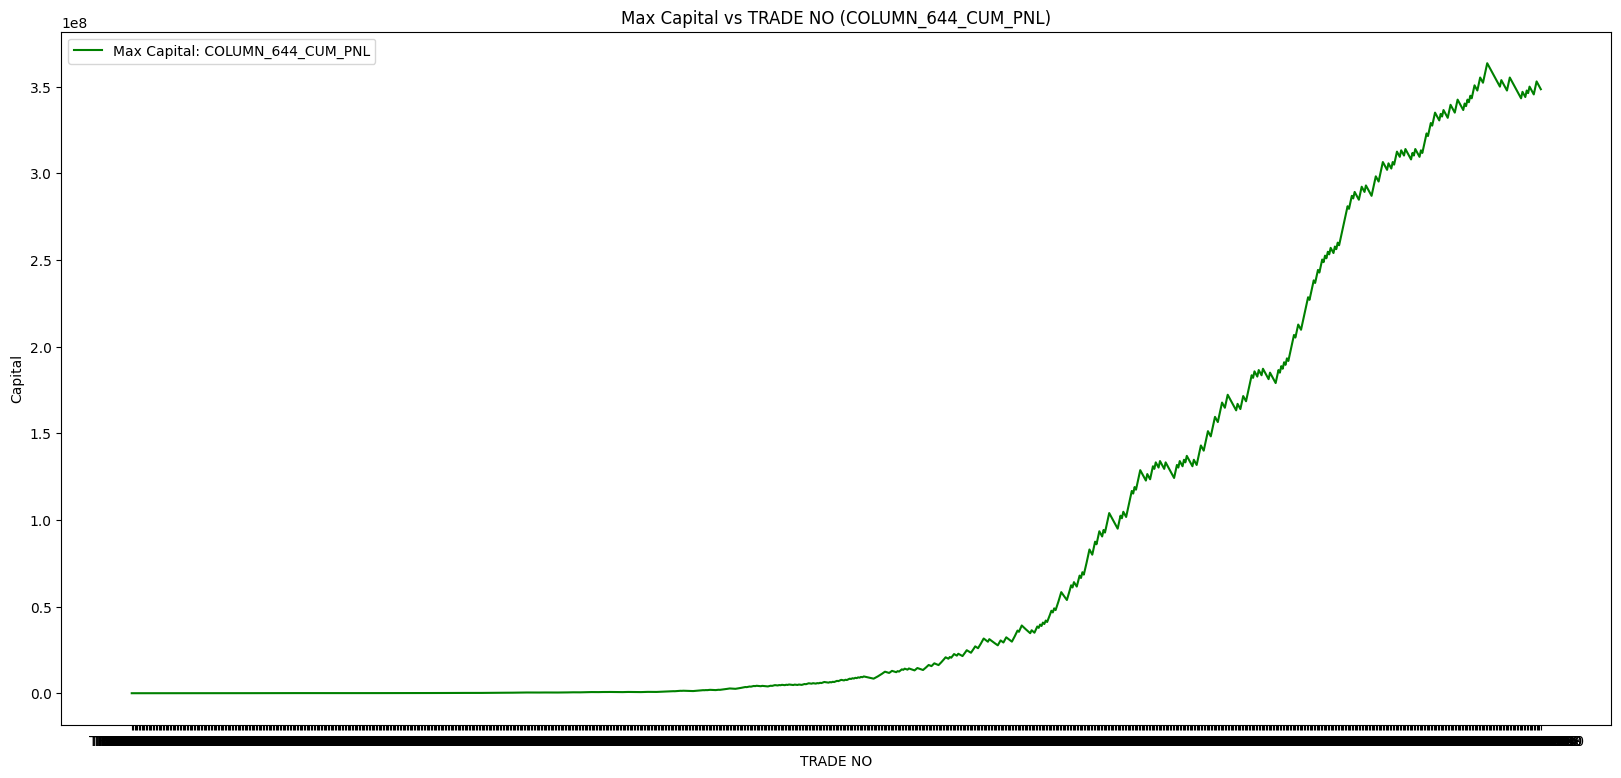

In [17]:
# Identify the column with max capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY['TRADE NO'], df_QTY[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(False)  # Remove gridlines
plt.show()

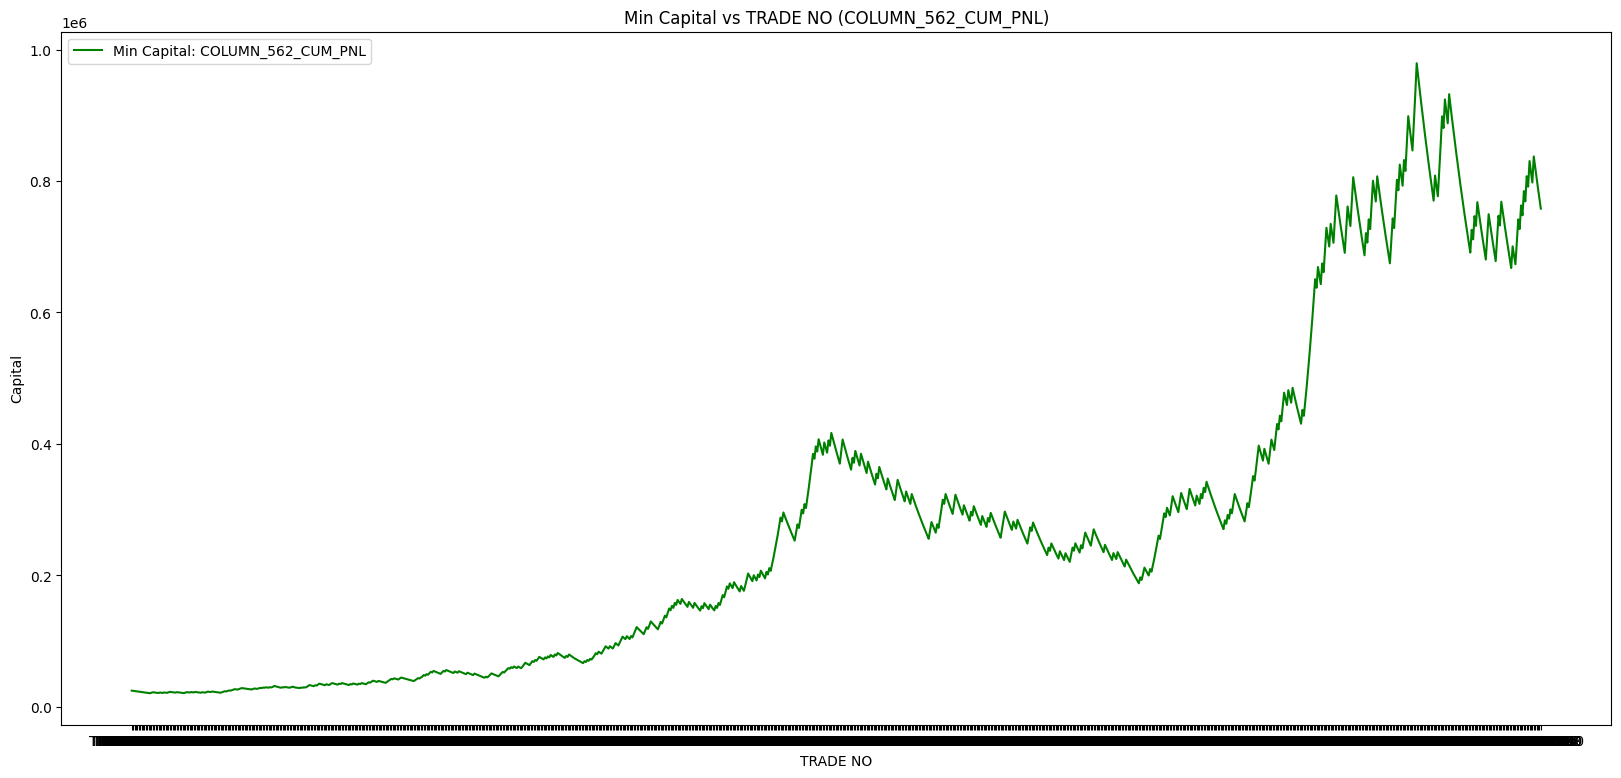

In [18]:
# Identify the column with min capital
capital_columns = [col for col in df_QTY.columns if col.endswith('_CUM_PNL')]
last_row = df_QTY.iloc[-1]
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY['TRADE NO'], df_QTY[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(False)  # Remove gridlines
plt.show()


In [19]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 5000


In [20]:
# Load the final_PnL.csv file
final_df = pd.read_csv('PnL_variable_lot.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 363447400.0


In [21]:
# Load entry and target/stoploss data
entry_df = pd.read_csv('trade_entry.csv')
target_stoploss_df = pd.read_csv('target_stoploss.csv')

# Create a dictionary to store the final PnL and QTY data
final_data = {"TRADE NO": entry_df["TRADE NO"]}  # Retain "TRADE NO"

# Define maximum quantity
MAX_QTY = 5000

# Iterate over each column (excluding "TRADE NO") to calculate cumulative PnL and QTY
for column in entry_df.columns[1:]:
    cumulative_capital = BASE_CAPITAL  # Initialize with BASE_CAPITAL
    pnl_column = []  # Store cumulative PnL values
    qty_column = []  # Store QTY values

    # Loop over each row to calculate QTY and update cumulative PnL
    for i in range(len(entry_df)):
        # Extract entry price and target/stoploss information
        entry_price = entry_df[column].iloc[i]
        target_or_stoploss = target_stoploss_df[column].iloc[i]

        # Calculate the risk per trade based on the current cumulative capital
        risk_per_trade = cumulative_capital * RISK_PERCENTAGE_TRADE

        # Calculate QTY for the current trade dynamically
        qty = int(risk_per_trade / LOSS_PER_LOT) if entry_price > 0 else 0

        # Limit the maximum quantity to MAX_QTY
        qty = min(qty, MAX_QTY)

        qty_column.append(qty)

        # Calculate Buy and Sell Values
        buy_value = entry_price * LOT_SIZE * qty
        sell_value = (entry_price + (REWARD_POINTS if target_or_stoploss == "TARGET" else -RISK_POINTS)) * LOT_SIZE * qty

        # Calculate Net PnL
        net_pnl = sell_value - buy_value

        # Calculate Transaction Charges
        transaction_charges_buy = transaction_charges_pct / 100 * buy_value
        transaction_charges_sell = transaction_charges_pct / 100 * sell_value
        stt = stt_pct / 100 * sell_value
        ipft = ipft_pct / 100 * (buy_value + sell_value)
        stamp_duty = stamp_duty_pct / 100 * (buy_value + sell_value)
        sebi_charges = sebi_charges_pct / 100 * (buy_value + sell_value)

        # Total Charges
        total_charges = (brokerage +
                         transaction_charges_buy +
                         transaction_charges_sell +
                         stt +
                         ipft +
                         stamp_duty +
                         sebi_charges)

        # GST Calculation
        gst = gst_pct * total_charges

        # Final PnL Calculation
        if net_pnl > 0:  # Profit scenario
            final_pnl = net_pnl - (total_charges + gst)
        else:  # Loss scenario
            final_pnl = net_pnl + (-total_charges - gst)

        # Update cumulative capital for the next row
        cumulative_capital += final_pnl
        pnl_column.append(cumulative_capital)

    # Store the QTY values as integers and cumulative PnL as floats in the final data dictionary
    final_data[f"{column}_QTY"] = qty_column
    final_data[f"{column}_CUM_PNL"] = pnl_column

# Create a DataFrame from the final data
final_df = pd.DataFrame(final_data)

# Format the cumulative PnL column to 2 decimal places
for column in entry_df.columns[1:]:
    final_df[f"{column}_CUM_PNL"] = final_df[f"{column}_CUM_PNL"].apply(lambda x: f"{float(x):.2f}")

# Save the DataFrame to a CSV file
final_df.to_csv('final_PnL_charges.csv', index=False)

In [22]:
pd.read_csv('final_PnL_charges.csv')

,TRADE NO,COLUMN_1_QTY,COLUMN_1_CUM_PNL,COLUMN_2_QTY,COLUMN_2_CUM_PNL,COLUMN_3_QTY,COLUMN_3_CUM_PNL,COLUMN_4_QTY,COLUMN_4_CUM_PNL,COLUMN_5_QTY,...,COLUMN_996_QTY,COLUMN_996_CUM_PNL,COLUMN_997_QTY,COLUMN_997_CUM_PNL,COLUMN_998_QTY,COLUMN_998_CUM_PNL,COLUMN_999_QTY,COLUMN_999_CUM_PNL,COLUMN_1000_QTY,COLUMN_1000_CUM_PNL
0,TRADE 0001,6,98118.78,6,104434.27,6,9.811916e+04,6,9.813836e+04,6,...,6,104426.17,6,98139.12,6,9.812010e+04,6,9.814213e+04,6,98134.97
1,TRADE 0002,6,96263.74,6,108861.39,6,9.624642e+04,6,9.627616e+04,6,...,6,102547.41,6,102565.10,6,9.625338e+04,6,9.627051e+04,6,96263.17
2,TRADE 0003,6,100677.11,7,106688.60,6,1.006624e+05,6,1.007012e+05,6,...,6,106956.83,6,106976.22,6,9.439608e+04,6,9.440285e+04,6,100682.19
3,TRADE 0004,6,98799.47,7,104505.27,6,1.050956e+05,6,9.884277e+04,6,...,7,112126.41,7,104807.16,6,9.252841e+04,6,9.881773e+04,6,98819.05
4,TRADE 0005,6,103230.54,6,108919.59,7,1.102542e+05,6,9.696457e+04,6,...,7,117286.11,6,109222.42,6,9.066471e+04,6,9.695327e+04,6,96938.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TRADE 0996,5000,85797396.33,4021,63280753.78,5000,1.088370e+08,5000,1.046829e+08,1679,...,2042,32131004.66,4782,70259343.60,5000,1.753876e+08,5000,1.587082e+08,1487,23401901.69
996,TRADE 0997,5000,89492944.41,4218,66390245.41,5000,1.125197e+08,5000,1.031232e+08,1761,...,2142,33714379.06,4683,68795178.43,5000,1.738329e+08,5000,1.571540e+08,1560,22913718.78
997,TRADE 0998,5000,87930294.98,4426,69645158.40,5000,1.161985e+08,5000,1.015640e+08,1725,...,2247,35369941.39,4586,72164878.88,5000,1.722833e+08,5000,1.608474e+08,1527,22438785.30
998,TRADE 0999,5000,86372822.44,4643,68207629.84,5000,1.146386e+08,5000,9.999823e+07,1809,...,2357,37107955.45,4810,70676399.69,5000,1.759679e+08,5000,1.645432e+08,1495,21970474.28


In [23]:
# Load the data from the CSV file
df_QTY_C = pd.read_csv('final_PnL_charges.csv')

# Get the last row
last_row = df_QTY_C.iloc[-1]

# Extract QTY values and find max and min along with their corresponding column names
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty = last_row[qty_columns].max()
min_qty = last_row[qty_columns].min()
max_qty_column = last_row[qty_columns].idxmax()
min_qty_column = last_row[qty_columns].idxmin()

# Extract CUM_PNL values and find max and min along with their corresponding column names
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital = last_row[capital_columns].max()
min_capital = last_row[capital_columns].min()
max_capital_column = last_row[capital_columns].idxmax()
min_capital_column = last_row[capital_columns].idxmin()

# Print the results
print(f"Max QTY: {max_qty:.0f} in Column: {max_qty_column}")

# Output the results
print(f"Max Capital: {max_capital:.0f} in Column: {max_capital_column}")
Max_Capital_growth_pct = max_capital*100/BASE_CAPITAL
print(f"Max Capital growth with variable lot: {Max_Capital_growth_pct:.2f} %")

print(f"Min Capital: {min_capital:.0f} in Column: {min_capital_column}")
Min_Capital_growth_pct = min_capital*100/BASE_CAPITAL
print(f"Min Capital growth with variable lot: {Min_Capital_growth_pct:.2f} %")

Max QTY: 5000 in Column: COLUMN_1_QTY
Max Capital: 425286701 in Column: COLUMN_644_CUM_PNL
Max Capital growth with variable lot: 425286.70 %
Min Capital: 1767248 in Column: COLUMN_378_CUM_PNL
Min Capital growth with variable lot: 1767.25 %


In [24]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing QTY (columns ending with "_QTY")
qty_columns = [col for col in final_df.columns if col.endswith("_QTY")]

# Find the maximum QTY value across all QTY columns
max_qty = final_df[qty_columns].max().max()

print(f"The maximum QTY value is: {max_qty}")

The maximum QTY value is: 5000


In [25]:
# Load the final_PnL.csv file
final_df = pd.read_csv('final_PnL_charges.csv')

# Extract all columns containing cumulative PnL (columns ending with "_CUM_PNL")
pnl_columns = [col for col in final_df.columns if col.endswith("_CUM_PNL")]

# Find the maximum PnL value across all PnL columns
max_pnl = final_df[pnl_columns].max().max()

print(f"The maximum PnL value is: {max_pnl}")

The maximum PnL value is: 442478181.75


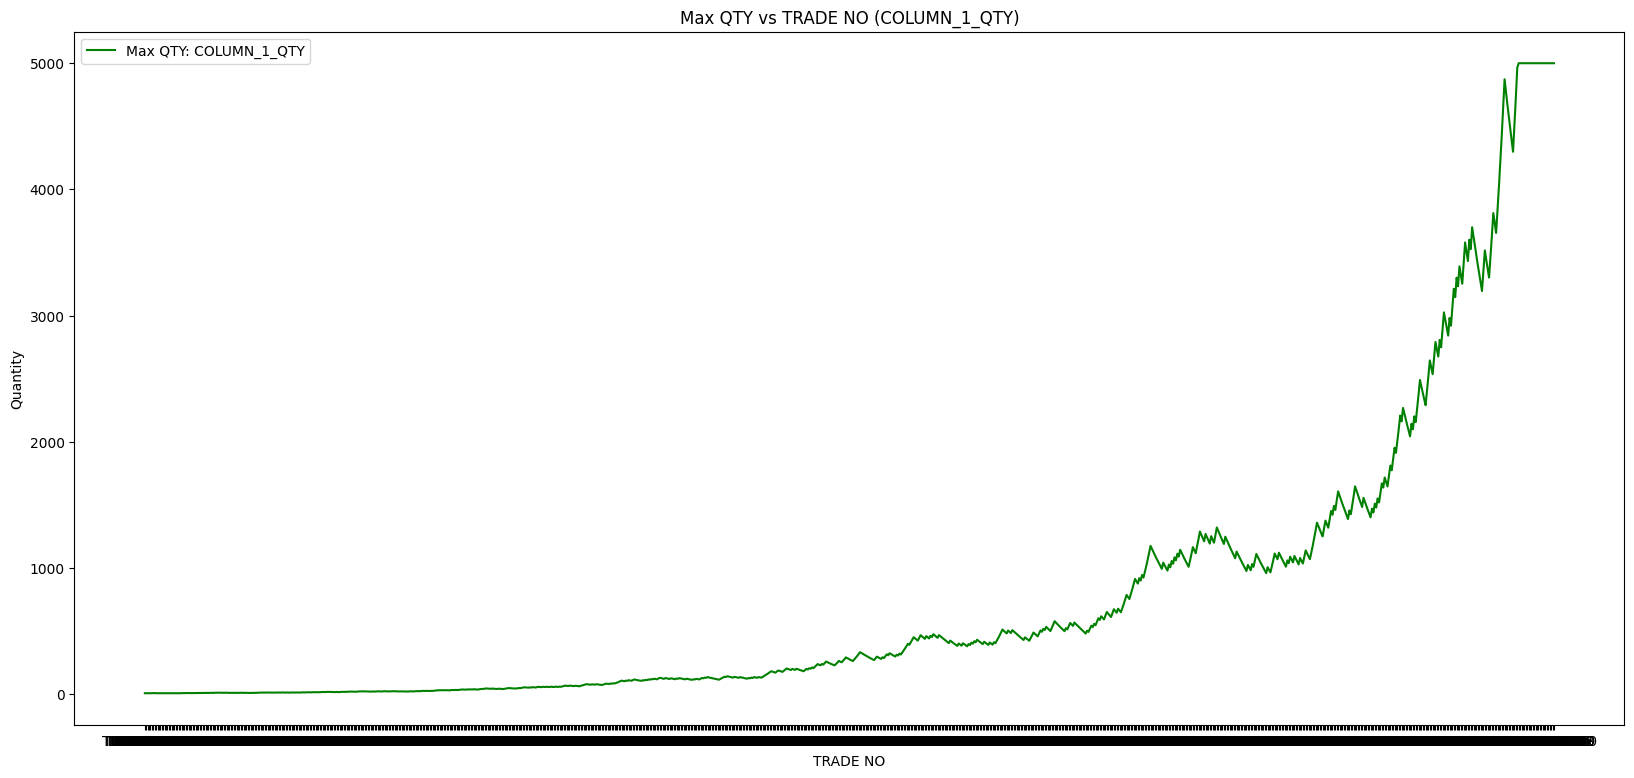

In [26]:
# Identify the column with max QTY from the last row
last_row = df_QTY_C.iloc[-1]
qty_columns = [col for col in df_QTY_C.columns if col.endswith('_QTY')]
max_qty_column = last_row[qty_columns].idxmax()

# Plot Max QTY vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_qty_column], label=f'Max QTY: {max_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Max QTY vs TRADE NO ({max_qty_column})')
plt.legend()
plt.grid(False)
plt.show()


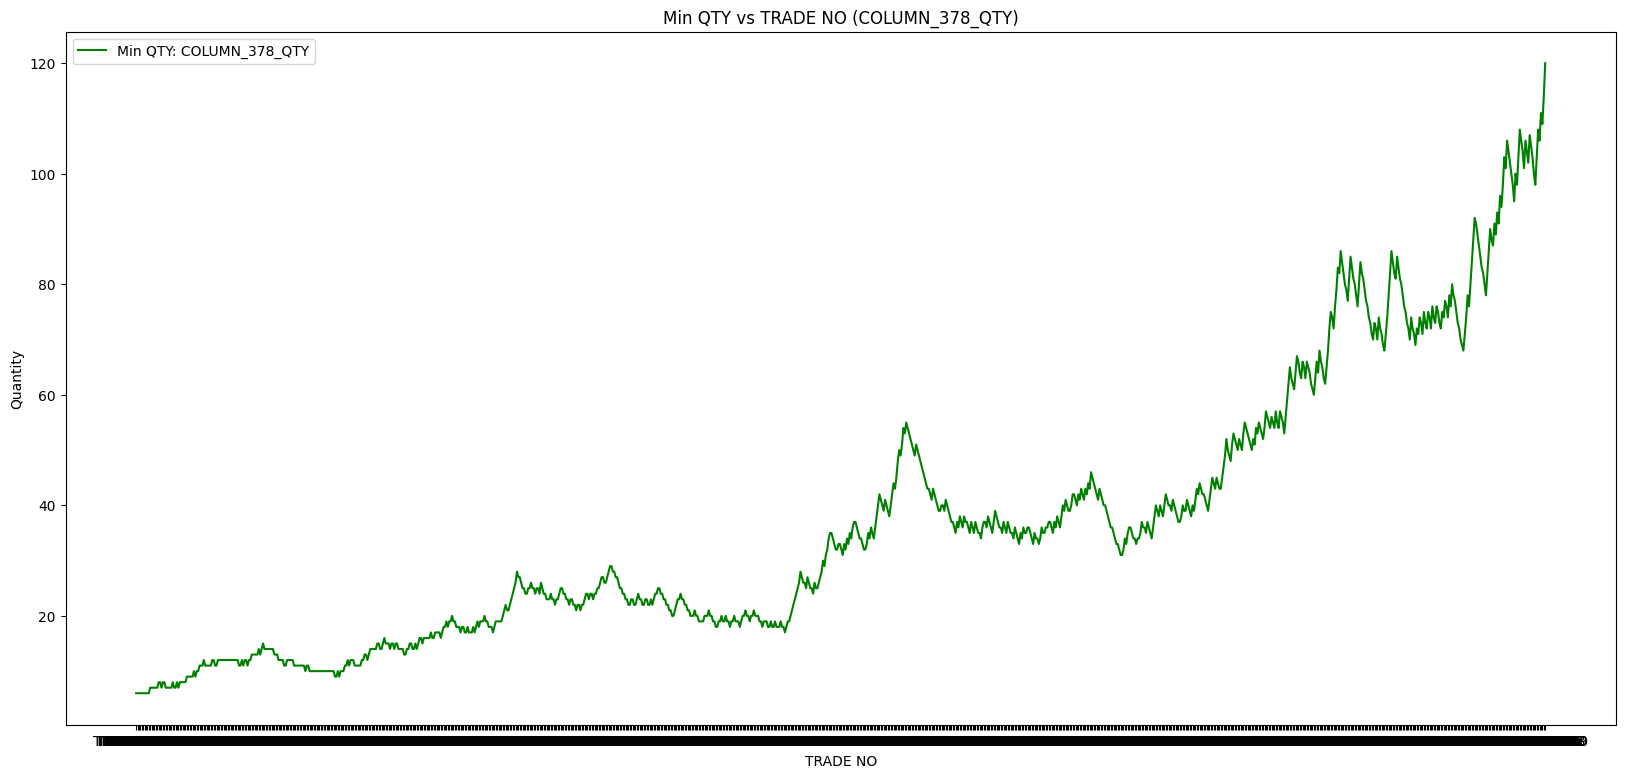

In [27]:
# Identify the column with min QTY from the last row
min_qty_column = last_row[qty_columns].idxmin()

# Plot Min QTY vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_qty_column], label=f'Min QTY: {min_qty_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Quantity')
plt.title(f'Min QTY vs TRADE NO ({min_qty_column})')
plt.legend()
plt.grid(False)
plt.show()

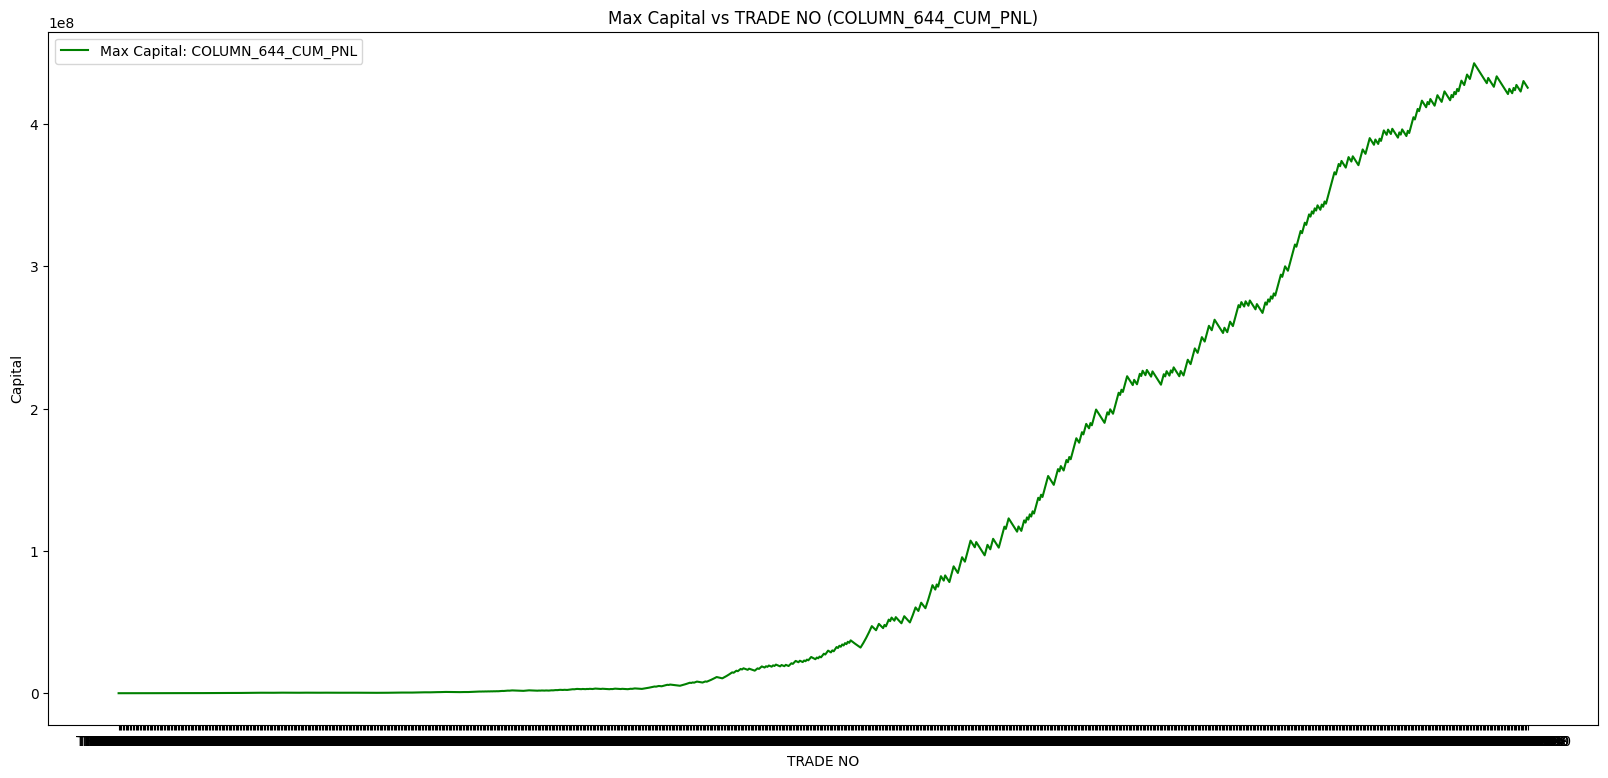

In [28]:
# Identify the column with max capital from the last row
capital_columns = [col for col in df_QTY_C.columns if col.endswith('_CUM_PNL')]
max_capital_column = last_row[capital_columns].idxmax()

# Plot Max Capital vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[max_capital_column], label=f'Max Capital: {max_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Max Capital vs TRADE NO ({max_capital_column})')
plt.legend()
plt.grid(False)
plt.show()


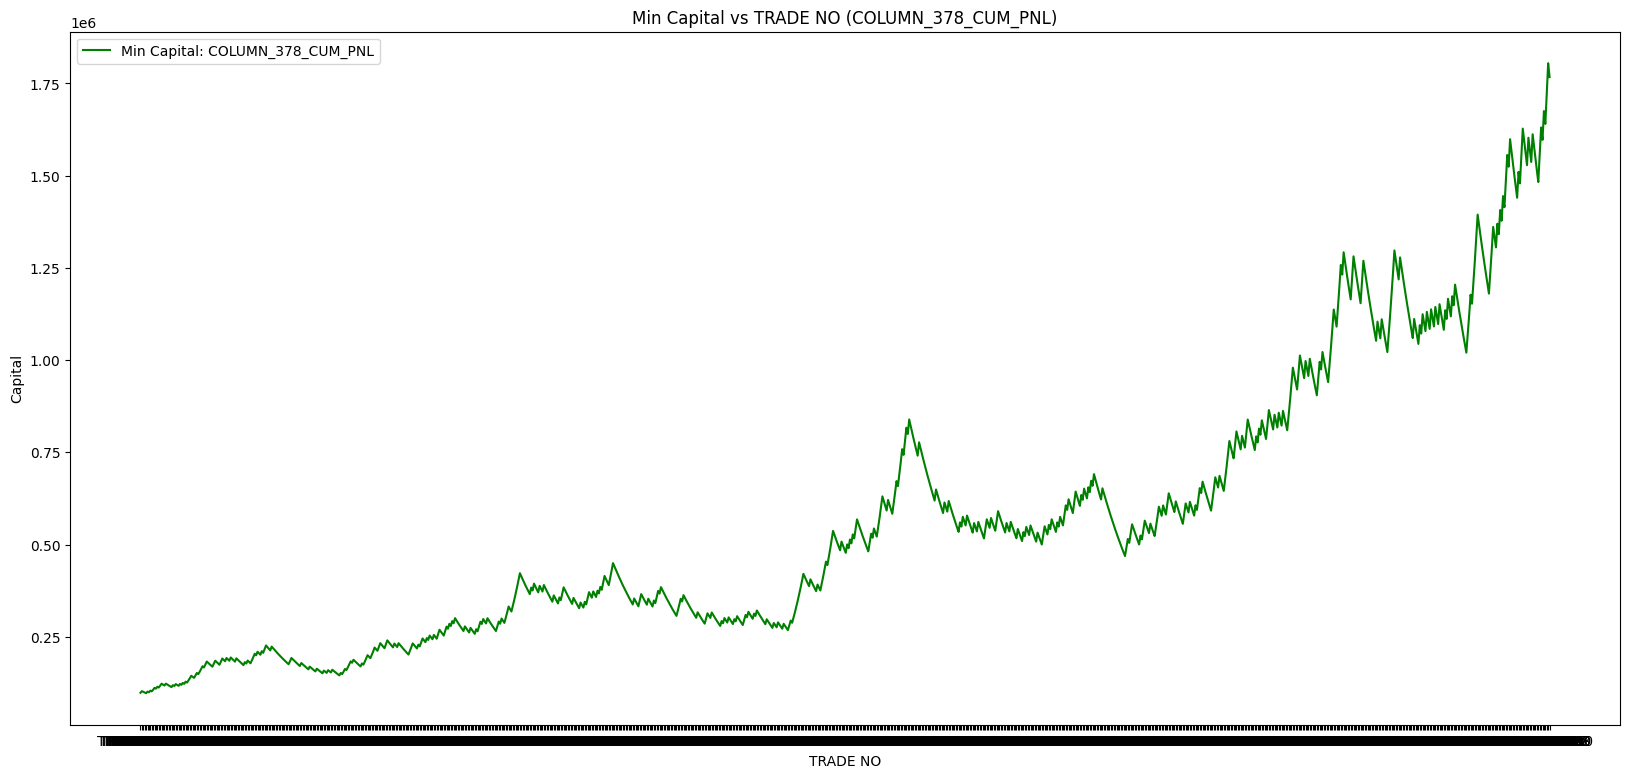

In [29]:
# Identify the column with min capital from the last row
min_capital_column = last_row[capital_columns].idxmin()

# Plot Min Capital vs TRADE NO
plt.figure(figsize=(20, 9))
plt.plot(df_QTY_C['TRADE NO'], df_QTY_C[min_capital_column], label=f'Min Capital: {min_capital_column}', color='green')
plt.xlabel('TRADE NO')
plt.ylabel('Capital')
plt.title(f'Min Capital vs TRADE NO ({min_capital_column})')
plt.legend()
plt.grid(False)
plt.show()


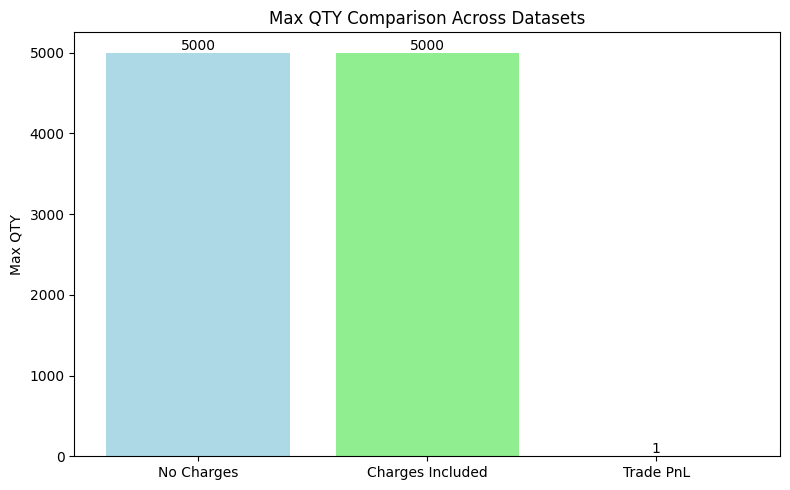

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_QTY(file_name):
    """
    Load data from a CSV file and find the maximum QTY from columns ending with '_QTY'.
    If no such columns are found, assume max quantity as 1.
    """
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent quantities (ending with '_QTY')
    qty_columns = [col for col in df.columns if col.endswith('_QTY')]

    # If QTY columns are present, find the max quantity; otherwise, assume max quantity as 1
    max_qty = last_row[qty_columns].max() if qty_columns else 1

    return max_qty

# Get Max QTY for the datasets
max_qty_no_charges = get_summary_QTY('PnL_variable_lot.csv')     # Without charges
max_qty_charges = get_summary_QTY('final_PnL_charges.csv')       # With charges

# For 'trade_pnl.csv', assume the max quantity as 1 (as per the requirement)
max_qty_additional = 1

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_qty_values = [max_qty_no_charges, max_qty_charges, max_qty_additional]

# Create a bar chart to compare Max QTY across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_qty_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max QTY')
plt.title('Max QTY Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_qty_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Max Capital (No Charges): 348447400.0
Max Capital (Charges Included): 425286701.15
Max Capital (Trade PnL): nan


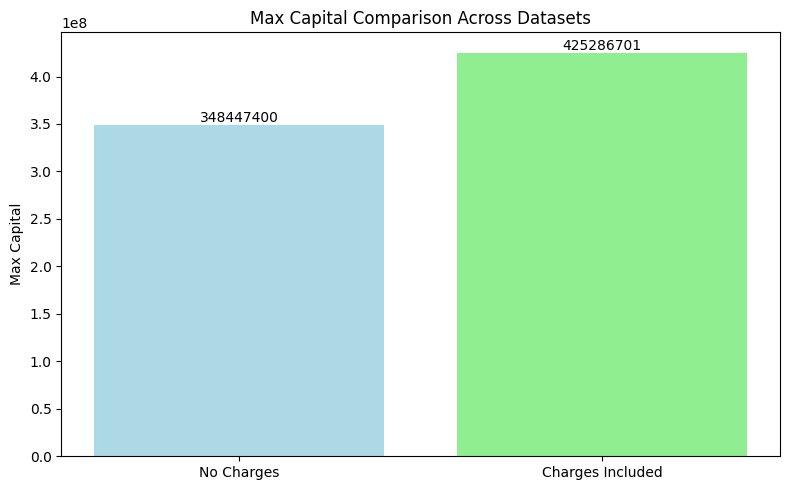

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_capital(file_name):
    """
    Load data from a CSV file and find the maximum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the maximum value in the cumulative capital columns
    max_capital = last_row[capital_columns].max()

    return max_capital

# Get Max Capital from the datasets
max_capital_no_charges = get_summary_capital('PnL_variable_lot.csv')  # No charges included
max_capital_charges = get_summary_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' and assume lot quantity is 1
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row and extract numeric values to find the max capital
last_row_trade = df_trade_pnl.iloc[-1]

# Convert the Series to a DataFrame to use select_dtypes()
last_row_trade_df = last_row_trade.to_frame().T

# Extract numeric values and find the max capital
numeric_values_trade = last_row_trade_df.select_dtypes(include=['number'])
max_capital_trade = numeric_values_trade.max(axis=1).values[0]  # Get the max value

# Debugging: Print the max capital values
print(f"Max Capital (No Charges): {max_capital_no_charges}")
print(f"Max Capital (Charges Included): {max_capital_charges}")
print(f"Max Capital (Trade PnL): {max_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
max_capital_values = [max_capital_no_charges, max_capital_charges, max_capital_trade]

# Create a bar chart to compare Max Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, max_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Max Capital')
plt.title('Max Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(max_capital_values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Last Row from trade_pnl.csv:
TRADE NO       TRADE 1000
COLUMN_1         149200.0
COLUMN_2         146050.0
COLUMN_3         153400.0
COLUMN_4         150250.0
                  ...    
COLUMN_996       135550.0
COLUMN_997       145000.0
COLUMN_998       166000.0
COLUMN_999       162850.0
COLUMN_1000      128200.0
Name: 999, Length: 1001, dtype: object
Min Capital (No Charges): 757900.0
Min Capital (Charges Included): 1767248.15
Min Capital (Trade PnL): 89350.0


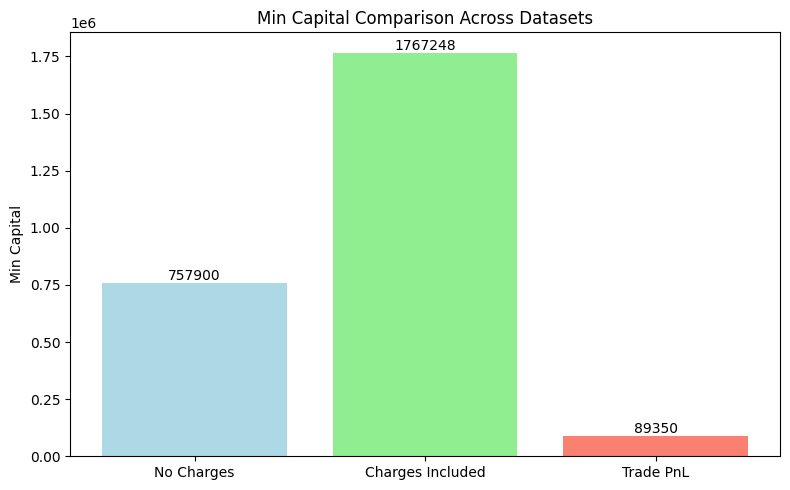

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def get_summary_min_capital(file_name):
    """
    Load data from a CSV file and find the minimum cumulative capital (CUM_PNL).
    """
    # Load the data from the CSV file
    df = pd.read_csv(file_name)

    # Get the last row of the DataFrame
    last_row = df.iloc[-1]

    # Identify columns that represent cumulative capital (ending with '_CUM_PNL')
    capital_columns = [col for col in df.columns if col.endswith('_CUM_PNL')]

    # Find the minimum value in the cumulative capital columns
    min_capital = last_row[capital_columns].min()

    return min_capital

# Get Min Capital from the datasets
min_capital_no_charges = get_summary_min_capital('PnL_variable_lot.csv')  # No charges included
min_capital_charges = get_summary_min_capital('final_PnL_charges.csv')    # Charges included

# Load 'trade_pnl.csv' for additional output
df_trade_pnl = pd.read_csv('trade_pnl.csv')

# Get the last row
last_row_trade = df_trade_pnl.iloc[-1]
print("Last Row from trade_pnl.csv:")
print(last_row_trade)  # Print the last row to check its contents

# Convert all values to numeric, coercing errors to NaN
numeric_values_trade = pd.to_numeric(last_row_trade, errors='coerce')

# Get the minimum capital from the numeric values
min_capital_trade = numeric_values_trade.min() if not numeric_values_trade.isnull().all() else None  # Safely handle all NaN case

# Debugging: Print the min capital values
print(f"Min Capital (No Charges): {min_capital_no_charges}")
print(f"Min Capital (Charges Included): {min_capital_charges}")
print(f"Min Capital (Trade PnL): {min_capital_trade}")

# Prepare data for visualization
labels = ['No Charges', 'Charges Included', 'Trade PnL']
min_capital_values = [min_capital_no_charges, min_capital_charges, min_capital_trade]

# Create a bar chart to compare Min Capital across datasets
plt.figure(figsize=(8, 5))
plt.bar(labels, min_capital_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.ylabel('Min Capital')
plt.title('Min Capital Comparison Across Datasets')

# Annotate bars with their respective values
for i, v in enumerate(min_capital_values):
    if pd.notna(v):  # Check if the value is not NaN
        plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()